In [80]:
%matplotlib inline
#!pip install -r requirements.txt
import numpy as np
import pandas as pd
import us
import re
import geocoder
import regex
import re
import matplotlib.pyplot as plt
# sanity check 
# sematic exploration 
# 

About the Data: 
-----------------------

Primary Dataset: https://www.emdat.be/

EM-DAT contains data on the occurrence and impacts of over 26,000 mass disasters worldwide from 1900 to the present day. The database is compiled from various sources, including UN agencies, non-governmental organizations, reinsurance companies, research institutes, and press agencies. The Centre for Research on the Epidemiology of Disasters (CRED) distributes the data in open access for non-commercial use.

Relevant variables:
=========================
• Disaster Type \
• Date of disaster \
• Location \
• Number of Homeless \
• Total Damages (in ‘000$) \
• Start Year \
• Start Month \
• End Year \
• End Month \
• Total Effected \
• Reconstruction Costs ('000 US$) \
• Total Damage ('000 US$) \
• Magnitude \
• Magnitude Scale 


Goal of this Project : 
=========================
Which regions, both in the U.S. and globally, emerge as the most resilient and desirable
places to live in the context of natural disaster risks?

Questions to be answered :
=========================

a. What are the global patterns in natural and technological disasters, comparing
across countries, continents, and U.S. states? \
b. What types of disasters have been recorded worldwide to date? \
c. How do storm patterns and trends compare globally, within the U.S., and
specifically in Florida? \
d. During which time of year do storms most frequently impact Florida and the
southeastern U.S. coast? 

Assumption : 
==============
i. Season Definition : Winter is considered December, January and February;
spring is March through May; summer is June through August; and fall or
autumn is September through November \
ii. Southeastern States: Alabama, Arkansas, Florida, Georgia, Kentucky,
Louisiana, Mississippi, North Carolina, South Carolina and Tennessee, as
well as Puerto Rico and the U.S. Virgin Islands) \
e. What are the trends in storm frequency and severity across the U.S.? \
f. What are the trends in all types of disasters across the U.S.? \
g. Which Countries and U.S. states are the least affected by natural disasters?


Common Variables used through the project 

In [43]:
berkeley_palette_primary = ["#002676", "#FDB515"]# Skipping white "#FFFFFF"
berkeley_palette_preferred_dark = ["#010133","#FC9313", "#00553A","#770747","#431170"]
                    
berkeley_palette_alternative_medium=["#004AAE","#FFC31B","#018943","#E7115E","#8236C7"]
berkeley_palette_alternative_light = ["#9FD1FF","#FFE88D","#B3E59A","#FFCFE5","#FFCFE5"]
berkeley_palette_black_grey=["#808080","#808080"]#Skipping black "#000000"

berkeley_palette_special_colors = ["#C09748"]

text_props = {'color':"w"}

In [44]:
data = pd.read_csv("public_emdat_Global_techNnatural.csv")
cols = data.columns
cols


Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

Know your Data

In [45]:
print("List of Country Names for which data is collected\n",list(data['Country'].unique()))

List of Country Names for which data is collected
 ['Djibouti', 'Sudan', 'Somalia', 'Angola', 'Bangladesh', 'Brazil', 'China', 'Egypt', 'Guatemala', 'Iran (Islamic Republic of)', 'Indonesia', 'Mozambique', 'Nigeria', 'Malawi', 'Peru', 'South Africa', 'India', 'United States of America', 'Norway', 'Côte d’Ivoire', 'Romania', 'Bulgaria', 'Libya', 'Switzerland', 'Réunion', 'Philippines', 'Spain', 'Pakistan', 'Germany', 'Ethiopia', 'Morocco', 'Botswana', 'Russian Federation', 'Mongolia', 'Congo', 'Afghanistan', 'United Republic of Tanzania', 'Lesotho', 'Kenya', 'Uganda', 'Viet Nam', 'Italy', 'Thailand', 'Bosnia and Herzegovina', 'Iceland', 'Namibia', 'Colombia', 'Zimbabwe', 'Israel', 'Jordan', 'Eswatini', 'Australia', 'Zambia', 'Paraguay', 'Madagascar', 'Mexico', 'Tuvalu', 'Argentina', 'Democratic Republic of the Congo', 'Hungary', 'Bolivia (Plurinational State of)', 'Chad', 'Sierra Leone', 'Austria', 'Niger', 'Malaysia', 'Cameroon', 'Sri Lanka', 'Czechia', 'Ukraine', 'Japan', 'Panama', 'C

Drop columns not necessary: 1. Does not add any value and has all value same


In [46]:
drop_list = ['Historic']
data.drop(drop_list,axis=1,inplace=True)
data.columns

Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name',
       'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

Fixing Column Heading

In [47]:
newcols=list(map(lambda x : re.sub('\s+|\.|/','',x),data.columns))
newcols = list(map(lambda x : re.sub("\(\'000US\$\)","_000USD",x),newcols))
data.columns = newcols
data.columns

Index(['DisNo', 'ClassificationKey', 'DisasterGroup', 'DisasterSubgroup',
       'DisasterType', 'DisasterSubtype', 'ExternalIDs', 'EventName', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'AssociatedTypes', 'OFDABHAResponse', 'Appeal', 'Declaration',
       'AIDContribution_000USD', 'Magnitude', 'MagnitudeScale', 'Latitude',
       'Longitude', 'RiverBasin', 'StartYear', 'StartMonth', 'StartDay',
       'EndYear', 'EndMonth', 'EndDay', 'TotalDeaths', 'NoInjured',
       'NoAffected', 'NoHomeless', 'TotalAffected',
       'ReconstructionCosts_000USD', 'ReconstructionCosts,Adjusted_000USD',
       'InsuredDamage_000USD', 'InsuredDamage,Adjusted_000USD',
       'TotalDamage_000USD', 'TotalDamage,Adjusted_000USD', 'CPI',
       'AdminUnits', 'EntryDate', 'LastUpdate'],
      dtype='object')

Data Quality checking 

In [48]:
# Checking All Dates columns
data[['StartYear','StartMonth', 'StartDay', 'EndYear', 'EndMonth', 'EndDay']]
data[data['StartYear'].isnull()] # No rows .. All good 
data[data['EndYear'].isnull()] # No rows .. All good 
data[data['StartMonth'].isnull()] # 68 rows missing Start Month
data[data['EndMonth'].isnull()] # 162 rows missing End Month


,DisNo,ClassificationKey,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,ExternalIDs,EventName,ISO,Country,...,ReconstructionCosts_000USD,"ReconstructionCosts,Adjusted_000USD",InsuredDamage_000USD,"InsuredDamage,Adjusted_000USD",TotalDamage_000USD,"TotalDamage,Adjusted_000USD",CPI,AdminUnits,EntryDate,LastUpdate
0,1999-9388-DJI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,Djibouti,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,Sudan,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,Somalia,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
535,2000-0580-ESP,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,ESP,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2722,""adm1_name"":""Castilla y Leó...",2003-07-01,2023-09-25
861,2000-9138-JAM,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,JAM,Jamaica,...,NaN,NaN,NaN,NaN,6000.0,10617.0,56.514291,"[{""adm1_code"":1636,""adm1_name"":""Clarendon""},{""...",2006-02-28,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10503,2014-9277-GTM,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2015-000150,NaN,GTM,Guatemala,...,NaN,NaN,NaN,NaN,58000.0,74651.0,77.694406,"[{""adm1_code"":64822,""adm1_name"":""El Progreso""}...",2014-09-01,2023-09-25
15468,2023-0721-KEN,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),GLIDE:FL-2023-000216,NaN,KEN,Kenya,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2023-11-06,2024-06-17
15581,2023-9234-ITA,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,ITA,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-02-26,2024-03-12
15993,2024-9197-MWI,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000066|GLIDE:DR-2024-000069,NaN,MWI,Malawi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-05,2024-08-12


In [50]:
data[['Magnitude','MagnitudeScale']]

,Magnitude,MagnitudeScale
0,NaN,Km2
1,NaN,Km2
2,NaN,Km2
3,NaN,NaN
4,47000.0,Km2
...,...,...
15994,NaN,Km2
15995,NaN,Km2
15996,NaN,Km2
15997,NaN,Km2


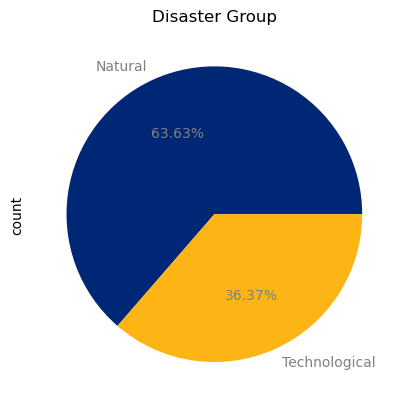

In [91]:
disaster_df = data[["DisasterGroup","DisasterSubgroup","DisasterType","DisasterSubtype"]]
disaster_df['DisasterGroup'].value_counts().plot.pie(autopct="%.2f%%", colors=berkeley_palette_primary,textprops={'color':'grey'},title='Disaster Group')

pass

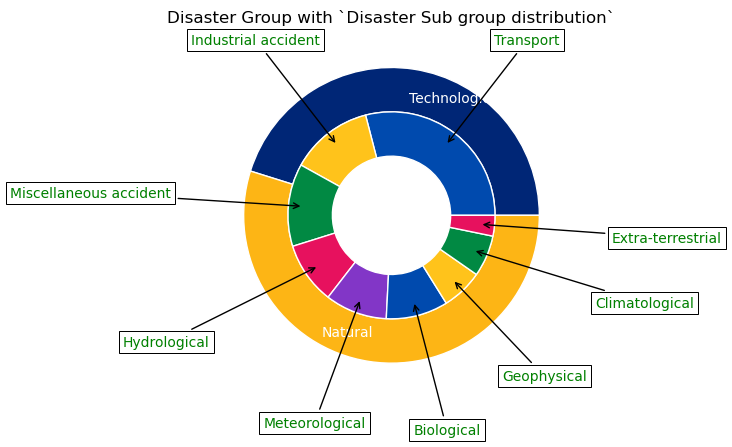

In [90]:
"""Code References:
1.https://stackoverflow.com/questions/67023749/how-can-i-draw-arrows-around-matplotlib-pie-to-point-each-label-to-their-respect
2.https://stackoverflow.com/questions/64795409/nested-pie-chart-from-dataframe
3.https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotate_transform.html#sphx-glr-gallery-text-labels-and-annotations-annotate-transform-py
"""
#df.groupby(['DisasterGroup'])['DisasterSubgroup'].value_counts()
size = 0.3
fig, ax = plt.subplots()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
ax.pie(disastertype_df.groupby('DisasterGroup')['DisasterSubgroup'].count(), radius=1, labeldistance = 0.8,
       wedgeprops=dict(width=size, edgecolor='w'),colors=berkeley_palette_primary,textprops={'color':"w"},labels=disastertype_df['DisasterGroup'].unique())

wedges, texts = ax.pie(disastertype_df['DisasterSubgroup'].value_counts(), radius=1-size, pctdistance=1.1,labeldistance = 1.5,
       wedgeprops=dict(width=size, edgecolor='w'),colors=berkeley_palette_alternative_medium,textprops={'color':"#808080"})

# = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40)
labels=disastertype_df['DisasterSubgroup'].unique()
#kw = dict(arrowprops=dict(arrowstyle="simple",color="0.9"), va="center")
bbox = dict(boxstyle="round", fc="0.8",color="y")
arrowprops = dict(
    arrowstyle="->")
#arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90,rad=10")
kw = dict(arrowprops=arrowprops, va="center",bbox=bbox_props,color="g")
for p, label in zip(wedges, labels):
    ang = np.deg2rad((p.theta1 + p.theta2)/2)
    y = np.sin(ang)
    x = np.cos(ang)
    horizontalalignment = "center" if abs(x) < abs(y) else "right" if x < 0 else "left"
    ax.annotate(label, xy=(0.6*x, 0.6*y), xytext=(1.5*x, 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
#plt.tight_layout()
#plt.show()
ax.set(aspect="equal", title='Disaster Group with `Disaster Sub group distribution`')
#ax.annotate(xytext=(5,5))
#plt.show()
pass

In [63]:
#df.groupby(['DisasterGroup'])['DisasterSubgroup'].value_counts()
disastertype_df = pd.DataFrame(disaster_df.groupby(['DisasterGroup','DisasterSubgroup'])['DisasterType'].value_counts())
disastertype_df = disastertype_df.reset_index().sort_values(['DisasterGroup','count'],ascending=False) 
print(f"Shows the Count of Data by its Disaster Type")
disastertype_df


Shows the Count of Data by its Disaster Type


,DisasterGroup,DisasterSubgroup,DisasterType,count
27,Technological,Transport,Road,2157
28,Technological,Transport,Water,1134
14,Technological,Industrial accident,Explosion (Industrial),461
29,Technological,Transport,Air,433
23,Technological,Miscellaneous accident,Fire (Miscellaneous),430
30,Technological,Transport,Rail,248
24,Technological,Miscellaneous accident,Miscellaneous accident (General),187
25,Technological,Miscellaneous accident,Collapse (Miscellaneous),160
26,Technological,Miscellaneous accident,Explosion (Miscellaneous),160
15,Technological,Industrial accident,Collapse (Industrial),149


In [65]:
#disaster_df['DisasterSubtype'].unique()
disastersubtype_df = pd.DataFrame(disaster_df.groupby(['DisasterGroup','DisasterSubgroup','DisasterType'])['DisasterSubtype'].value_counts())
disastersubtype_df = disastersubtype_df.reset_index().sort_values(['count'],ascending=False) 
print(f"Shows the Count of Data by its Disaster SubType")
disastersubtype_df

Shows the Count of Data by its Disaster SubType


,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,count
61,Technological,Transport,Road,Road,2157
23,Natural,Hydrological,Flood,Riverine flood,2009
35,Natural,Meteorological,Storm,Tropical cyclone,1343
24,Natural,Hydrological,Flood,Flood (General),1338
62,Technological,Transport,Water,Water,1134
...,...,...,...,...,...
0,Natural,Biological,Animal incident,Animal incident,1
22,Natural,Geophysical,Volcanic activity,Lahar,1
17,Natural,Geophysical,Mass movement (dry),Avalanche (dry),1
12,Natural,Extra-terrestrial,Impact,Collision,1


In [66]:
flood_data = disaster_df[disaster_df['DisasterType']=='Storm']['DisasterSubtype']
flood_df = pd.DataFrame(flood_data.value_counts())
flood_df = flood_df.reset_index().sort_values(['count'],ascending=False) 
print(f"Shows the Count of Data by its Disaster SubType")
flood_df

Shows the Count of Data by its Disaster SubType


,DisasterSubtype,count
0,Tropical cyclone,1343
1,Storm (General),326
2,Severe weather,224
3,Blizzard/Winter storm,183
4,Lightning/Thunderstorms,171
5,Tornado,168
6,Extra-tropical storm,144
7,Hail,50
8,Sand/Dust storm,16
9,Storm surge,10


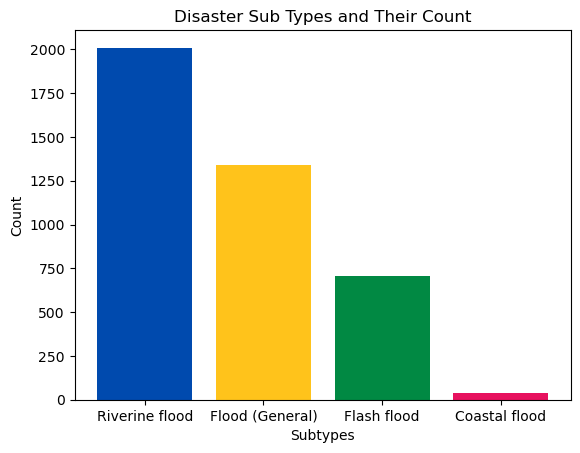

In [67]:
"""
References :
1.https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
"""
df_axis=disastersubtype_df[disastersubtype_df['DisasterType']=='Flood'][['DisasterSubtype','count']]
fig, ax = plt.subplots()
# Plotting the data
#plt.figure(figsize=(4, 4))
ax.bar(df_axis['DisasterSubtype'], df_axis['count'],label=df_axis['DisasterSubtype'].to_list(), color=berkeley_palette_alternative_medium)

ax.set_ylabel('Count')
ax.set_title('Disaster Count per Disaster Sub type')
#ax.legend(title='Disaster subtype') # If you need additional labels 

plt.xlabel('Subtypes')
plt.title('Disaster Sub Types and Their Count')
#plt.tight_layout()

# Display the graph
plt.show()
#disastersubtype_df.columns

In [71]:
data.groupby(['DisasterType'])['EntryDate'].count()

DisasterType
Air                                  433
Animal incident                        1
Chemical spill                        23
Collapse (Industrial)                149
Collapse (Miscellaneous)             160
Drought                              415
Earthquake                           670
Epidemic                             868
Explosion (Industrial)               461
Explosion (Miscellaneous)            160
Extreme temperature                  530
Fire (Industrial)                    112
Fire (Miscellaneous)                 430
Flood                               4092
Gas leak                              35
Glacial lake outburst flood            5
Impact                                 1
Industrial accident (General)        102
Infestation                           29
Mass movement (dry)                   13
Mass movement (wet)                  471
Miscellaneous accident (General)     187
Oil spill                              5
Poisoning                             21
Rad

In [73]:
#data[['Disaster Group','Classification Key', 'Disaster Group','Disaster Subgroup', 'Disaster Type', 'Disaster Subtype']]
data['DisasterType'].unique()
data['DisasterType'].value_counts()['Storm']

2641

In [75]:
data['DisasterSubtype'].unique()


array(['Drought', 'Road', 'Riverine flood', 'Cold wave',
       'Fire (Miscellaneous)', 'Ash fall', 'Storm (General)',
       'Land fire (Brush, Bush, Pasture)', 'Tornado', 'Ground movement',
       'Rail', 'Air', 'Blizzard/Winter storm', 'Collapse (Industrial)',
       'Tropical cyclone', 'Flash flood', 'Collapse (Miscellaneous)',
       'Fire (Industrial)', 'Explosion (Miscellaneous)', 'Viral disease',
       'Infectious disease (General)', 'Bacterial disease', 'Water',
       'Coastal flood', 'Landslide (wet)', 'Flood (General)', 'Mudslide',
       'Explosion (Industrial)', 'Forest fire', 'Chemical spill',
       'Gas leak', 'Avalanche (wet)', 'Parasitic disease',
       'Locust infestation', 'Hail', 'Miscellaneous accident (General)',
       'Heat wave', 'Severe weather', 'Sudden Subsidence (wet)',
       'Poisoning', 'Landslide (dry)', 'Lightning/Thunderstorms',
       'Industrial accident (General)', 'Sand/Dust storm', 'Tsunami',
       'Extra-tropical storm', 'Severe winter cond

Explore Disaster Data in USA

In [77]:
data_usa = data[data.Country == 'United States of America'].reset_index()
data_usa

,index,DisNo,ClassificationKey,DisasterGroup,DisasterSubgroup,DisasterType,DisasterSubtype,ExternalIDs,EventName,ISO,...,ReconstructionCosts_000USD,"ReconstructionCosts,Adjusted_000USD",InsuredDamage_000USD,"InsuredDamage,Adjusted_000USD",TotalDamage_000USD,"TotalDamage,Adjusted_000USD",CPI,AdminUnits,EntryDate,LastUpdate
0,22,2000-0021-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,200500.0,354778.0,210000.0,371587.0,56.514291,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25
1,35,2000-0035-USA,tec-tra-air-air,Technological,Transport,Air,Air,NaN,MD-83,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
2,63,2000-0067-USA,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28696,""adm2_name"":""Bullock""},{""a...",2005-04-24,2023-09-25
3,74,2000-0080-USA,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":3231,""adm1_name"":""Kentucky""},{""a...",2005-09-16,2023-09-25
4,118,2000-0128-USA,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28998,""adm2_name"":""Alachua""},{""a...",2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,15825,2024-0422-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2024-000105,Hurricane 'Beryl',USA,...,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,2024-07-10,2024-10-29
705,15936,2024-0669-USA,nat-cli-wil-wil,Natural,Climatological,Wildfire,Wildfire (General),NaN,"'Brige fire', 'Airport fire'",USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-24,2024-10-21
706,15953,2024-0693-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Helene',USA,...,NaN,NaN,NaN,NaN,55000000.0,NaN,NaN,NaN,2024-09-30,2024-10-29
707,15974,2024-0722-USA,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Milton',USA,...,NaN,NaN,NaN,NaN,10000000.0,NaN,NaN,NaN,2024-10-10,2024-10-28


In [83]:
us_state_names =["Alabama",
        "Alaska",
        "Arizona",
        "Aarkansas",
        "California",
        "Colorado",
        "Connecticut",
        "Delaware",
        "Florida",
        "Georgia",
        "Hawaii",
        "Idaho",
        "Illinois",
        "Indiana",
        "Iowa",
        "Kansas",
        "Kentucky",
        "Louisiana",
        "Maine",
        "Maryland",
        "Massachusetts",
        "Michigan",
        "Minnesota",
        "Mississippi",
        "Missouri",
        "Montana",
        "nebraska",
        "Nevada",
        "New Hampshire",
        "New Jersey",
        "New Mexico",
        "New York",
        "North Carolina",
        "North Dakota",
        "Ohio",
        "Oklahoma",
        "Oregon",
        "Pennsylvania",
        "South Carolina",
        "South dakota",
        "Tennessee",
        "Texas",
        "Utah",
        "Vermont",
        "Virginia",
        "Washington",
        "West Virginia",
        "Wisconsin",
        "Wyoming",
    ]
us_state_correction = {
        "au large de la californie": "California",
        "Pacifique":"California",
        "au large de la Californie":"California",
        "nouveau mexique": "New Mexico",
        "chicago": "Illinois",
        "los angeles": "California",
        "swisher districts": "Texas",
        "rhode isl. ": "Rhode Island",
        "near los angeles": "California",
        "atlantic terminal station": "New York",
        "north california": "None",
        "los angeles": "California",
        "jerauld": "South Dakota",
        "jefferson davis": "Mississippi",
        "nassau-florida": "Florida",
        "wilkes": "North Carolina",
        "noble in richland": "Illinois",
        "marion-in": "Indiana",
        "central michigan ": "Michigan",
        "south california": "California",
        "south-western louisiana": "Louisiana",
        "north california ": "California",
        "northern washington ": "Washington",
        "central-northern usa": "None",
        "montana and idaho s": "None",
        "hollywood": "California",
        "eastern washington ": "Washington",
        "eastern new mexico": "New Mexico",
        "district of columbia":"Washington, D.C.",
        "Nouveau Mexique" :"New Mexico"
    }

In [84]:
# Fix the following :
# We have some states in brackets '()'
# the state name is attached with text 'province' 
# The state name is attached with text 'state'
# Some location column has more than one state combined in one row. We will duplicate those rows and add rows for each state in seperate rows
# We will also fix letter cases.The capitalize() method returns a string where the first character is upper case, and the rest is lower case.

data_usa = data[data.Country == 'United States of America'].reset_index()
locations=list(data_usa['Location'])

for loc in locations:
    indx = data_usa[data_usa['Location'] == loc].index # Lets collect the index of this row to use it later in this section
    if not loc is np.nan:
        loc_list = loc.split(',') # split all the location which contains ',' to segregate state(s)
        if len(loc_list) == 0:
            # This line is if the location contains valid state. no need to continue further.
            if not us.states.lookup(ll.strip()):
                state = us.states.lookup(ll).__str__()
                data_usa.loc[indx,"Location"] = state
            continue

        # Check if the row needs to be duplicated with more than one province
        provinces = 0
        state = ""
        for ll in loc_list:
            matched = re.match('.*\((.*)\)',ll) # Match the brackets with regular expression
            if 'province' in ll.lower() or ll.capitalize().strip() in us_state_names or ll.strip().lower() in us_state_correction.keys() or matched:
                provinces+=1

                if matched:
                    state =matched[1]
                else:
                    state = ll
                state = re.sub(r"state|provinces|province|\)|\(", "", state).lower()

                if state in us_state_correction:
                    state = us_state_correction[state] # Get the correct state name from the dictionary
                if not us.states.lookup(state.strip()):
                    state = us.states.lookup(state).__str__()
                if provinces >1:
                    # We will duplicate the row with new state name
                    new_df=data_usa.iloc[indx].copy()
                    new_df['Location'] = state.capitalize().strip()
                    data_usa=data_usa._append([new_df],ignore_index=True)
                else:                    
                    state =state.capitalize().strip()
                    data_usa.loc[indx,"Location"] = state

data_usa["Location"] = data_usa["Location"].str.capitalize()   
         
         

Lets Check if there are any NULL location

In [89]:
data_usa_null = data_usa[data_usa['Location'].isna()] # Only one is found
# This row can be dropped since the 

In [ ]:
What types of disasters have been recorded worldwide to date?
list out all disasters, catergise them by natural vs technological 

Which types of disasters have had the greatest impact on livelihoods globally and within the U.S.?
bar chart for total damages and total effected. 

How do storm patterns and trends compare globally, within the U.S., and specifically in Florida?
During which time of year do storms most frequently impact Florida and the southeastern U.S. coast?
Which areas within the southeastern U.S. are most affected by storms?(Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina and Tennessee, as well as Puerto Rico and the U.S. Virgin Islands)
What are the trends in storm frequency and severity across the U.S.?
What are the trends in all types of disasters across the U.S.?
Which U.S. states are the least affected by natural disasters?
Which regions, both in the U.S. and globally, emerge as the most resilient and desirable places to live in the context of natural disaster risks?
Can we conclude that certain areas are more suitable for sustainable and secure living based on disaster resilience?
This sequence sets the stage by introducing the types and impact of disasters, explores regional trends, and then concludes with insights into ideal places for sustainable living. Let me know if this fits!


In [ ]:
import matplotlib.pyplot as plt

# Data for the disaster types and counts
disaster_types = [
    'Air', 'Animal incident', 'Chemical spill', 'Collapse (Industrial)', 'Collapse (Miscellaneous)',
    'Drought', 'Earthquake', 'Epidemic', 'Explosion (Industrial)', 'Explosion (Miscellaneous)',
    'Extreme temperature', 'Fire (Industrial)', 'Fire (Miscellaneous)', 'Flood', 'Gas leak',
    'Glacial lake outburst flood', 'Impact', 'Industrial accident (General)', 'Infestation',
    'Mass movement (dry)', 'Mass movement (wet)', 'Miscellaneous accident', 'Oil spill', 'Poisoning',
    'Radiation', 'Rail', 'Road', 'Storm', 'Volcanic activity', 'Water', 'Wildfire'
]
counts = [
    433, 1, 23, 149, 160, 415, 670, 868, 461, 160, 530, 112, 430, 4092, 35, 5, 1, 102, 29, 13, 471,
    187, 5, 21, 2, 248, 2157, 2641, 128, 1134, 316
]

# Plotting the data
plt.figure(figsize=(10, 8))
plt.barh(disaster_types, counts, color='skyblue')
plt.xlabel('Count of Disasters')
plt.title('Disaster Types and Their Frequency')
plt.tight_layout()

# Display the graph
plt.show()

In [12]:
#data['Total Damage (\'000 US$)'].describe()
dd = data.groupby(['Country'])['Total Affected'].sum()
pp=data.groupby(['Disaster Group'])['Total Affected'].sum()

#.plot.bar()

In [ ]:
['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],

In [ ]:
groupby.size ... gives you count of sample set 
use group_set

# gg = group_by(['first','second']).mean # gives you two columns 
# gg.unstack to make second column group as column header 
#use unstack to make second column 

# you can now use them to plot.
# gg.unstack().plot(kind='bar')
# this makes first as xaxis and y axis as values and gives plot for all the types of second column in different color 